# Cluster countries according to their happiness scores

# 1. Problem definition
> Group countries with similar happiness profiles

> Maybe spot regional patterns, economic similarities, or cultural clusters.

# 2. Dataset
The dataset comes from Kaggle and originally from the World Happiness Report from 2023 (Gallup World Poll). https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2023/data

# 3. Evaluation
* Silhouette Score: How well each point fits in its cluster vs. others. Range: -1 to 1. Closer to 1 = chef’s kiss.

* Davies-Bouldin Index: Lower is better. Measures average “similarity” between clusters.

* Calinski-Harabasz Index: Higher is better. Ratio of between-cluster dispersion to within-cluster dispersion.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [12]:
import seaborn as sns

In [22]:
! pwd

/Users/dev/Desktop/machine_learning/6. World Happiness Rep - clustering/world-happiness


In [28]:
# Let's import the dataset
df = pd.read_csv("data/WHR2023.csv")
df

,Country name,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.804,0.036,7.875,7.733,10.792,0.969,71.150,0.961,-0.019,0.182,1.778,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,Denmark,7.586,0.041,7.667,7.506,10.962,0.954,71.250,0.934,0.134,0.196,1.778,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,Iceland,7.530,0.049,7.625,7.434,10.896,0.983,72.050,0.936,0.211,0.668,1.778,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,Israel,7.473,0.032,7.535,7.411,10.639,0.943,72.697,0.809,-0.023,0.708,1.778,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,Netherlands,7.403,0.029,7.460,7.346,10.942,0.930,71.550,0.887,0.213,0.379,1.778,1.942,1.488,0.545,0.672,0.251,0.394,2.110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),3.207,0.095,3.394,3.020,7.007,0.652,55.375,0.664,0.086,0.834,1.778,0.531,0.784,0.105,0.375,0.183,0.068,1.162
133,Zimbabwe,3.204,0.061,3.323,3.084,7.641,0.690,54.050,0.654,-0.046,0.766,1.778,0.758,0.881,0.069,0.363,0.112,0.117,0.905
134,Sierra Leone,3.138,0.082,3.299,2.976,7.394,0.555,54.900,0.660,0.105,0.858,1.778,0.670,0.540,0.092,0.371,0.193,0.051,1.221
135,Lebanon,2.392,0.044,2.479,2.305,9.478,0.530,66.149,0.474,-0.141,0.891,1.778,1.417,0.476,0.398,0.123,0.061,0.027,-0.110


# 1. EDA

In [33]:
# Creating a working df
df_work = df.copy()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                137 non-null    object 
 1   Ladder score                                137 non-null    float64
 2   Standard error of ladder score              137 non-null    float64
 3   upperwhisker                                137 non-null    float64
 4   lowerwhisker                                137 non-null    float64
 5   Logged GDP per capita                       137 non-null    float64
 6   Social support                              137 non-null    float64
 7   Healthy life expectancy                     136 non-null    float64
 8   Freedom to make life choices                137 non-null    float64
 9   Generosity                                  137 non-null    float64
 10  Perceptions of

In [42]:
df_work.isnull().sum()

Country name                                  0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       1
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           1
dtype: int64

In [37]:
df_work.shape

(137, 19)

In [39]:
df_work.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,1.370000e+02,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000,136.000000
mean,5.539796,0.064715,5.666526,5.412971,9.449796,0.799073,64.967632,0.787394,0.022431,0.725401,1.778000e+00,1.406985,1.156212,0.366176,0.540000,0.148474,0.145898,1.777838
std,1.139929,0.023031,1.117421,1.163724,1.207302,0.129222,5.750390,0.112371,0.141707,0.176956,2.897173e-15,0.432963,0.326322,0.156691,0.149501,0.076053,0.126723,0.504390
min,1.859000,0.029000,1.923000,1.795000,5.527000,0.341000,51.530000,0.382000,-0.254000,0.146000,1.778000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,0.047000,4.980000,4.496000,8.591000,0.722000,60.648500,0.724000,-0.074000,0.668000,1.778000e+00,1.099000,0.962000,0.248500,0.455000,0.097000,0.060000,1.555250
50%,5.684000,0.060000,5.797000,5.529000,9.567000,0.827000,65.837500,0.801000,0.001000,0.774000,1.778000e+00,1.449000,1.227000,0.389500,0.557000,0.137000,0.111000,1.848500
75%,6.334000,0.077000,6.441000,6.243000,10.540000,0.896000,69.412500,0.874000,0.117000,0.846000,1.778000e+00,1.798000,1.401000,0.487500,0.656000,0.199000,0.187000,2.078750
max,7.804000,0.147000,7.875000,7.733000,11.660000,0.983000,77.280000,0.961000,0.531000,0.929000,1.778000e+00,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


This looks like a pretty clean dataset. Some work to be done, scaling some features, droping some features, a couple of missing values..

In [84]:
# Drop some of the redundant features that appear to be derived or duplicated
df_work_clean = df_work.loc[:,["Ladder score", "Social support", "Logged GDP per capita", "Healthy life expectancy", "Freedom to make life choices",
                              "Generosity", "Perceptions of corruption"]]
df_work_clean

,Ladder score,Social support,Logged GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.804,0.969,10.792,71.150,0.961,-0.019,0.182
1,7.586,0.954,10.962,71.250,0.934,0.134,0.196
2,7.530,0.983,10.896,72.050,0.936,0.211,0.668
3,7.473,0.943,10.639,72.697,0.809,-0.023,0.708
4,7.403,0.930,10.942,71.550,0.887,0.213,0.379
...,...,...,...,...,...,...,...
132,3.207,0.652,7.007,55.375,0.664,0.086,0.834
133,3.204,0.690,7.641,54.050,0.654,-0.046,0.766
134,3.138,0.555,7.394,54.900,0.660,0.105,0.858
135,2.392,0.530,9.478,66.149,0.474,-0.141,0.891


In [154]:
df_work_clean.describe()

,Ladder score,Social support,Logged GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,137.000000,137.000000,137.000000,136.000000,137.000000,137.000000,137.000000
mean,5.539796,0.799073,9.449796,64.967632,0.787394,0.022431,0.725401
std,1.139929,0.129222,1.207302,5.750390,0.112371,0.141707,0.176956
min,1.859000,0.341000,5.527000,51.530000,0.382000,-0.254000,0.146000
25%,4.724000,0.722000,8.591000,60.648500,0.724000,-0.074000,0.668000
50%,5.684000,0.827000,9.567000,65.837500,0.801000,0.001000,0.774000
75%,6.334000,0.896000,10.540000,69.412500,0.874000,0.117000,0.846000
max,7.804000,0.983000,11.660000,77.280000,0.961000,0.531000,0.929000


In [86]:
df_work_clean.isnull().sum()

Ladder score                    0
Social support                  0
Logged GDP per capita           0
Healthy life expectancy         1
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Ladder score'),
  Text(1.5, 0, 'Social support'),
  Text(2.5, 0, 'Logged GDP per capita'),
  Text(3.5, 0, 'Healthy life expectancy'),
  Text(4.5, 0, 'Freedom to make life choices'),
  Text(5.5, 0, 'Generosity'),
  Text(6.5, 0, 'Perceptions of corruption')])

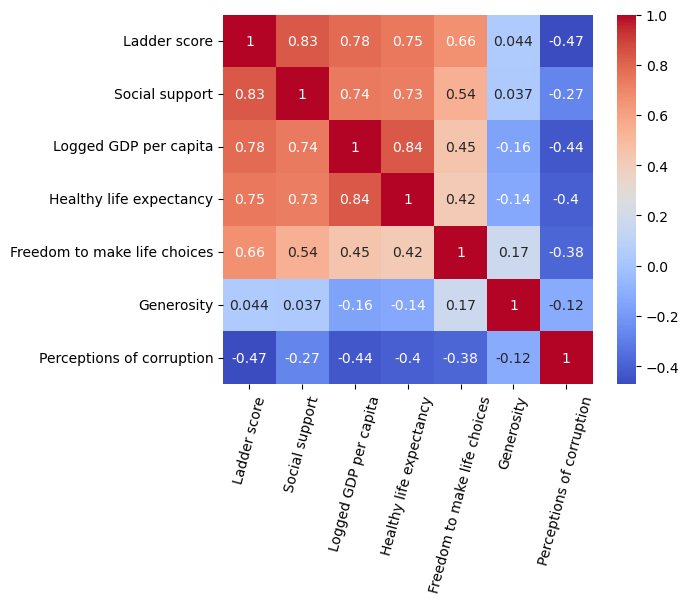

In [110]:
#Let's plot some data
sns.heatmap(df_work_clean.corr(), annot=True, cmap="coolwarm", square=True)
plt.xticks(rotation=75)

The correlation matrix above demonstrates the relationship between the features. 

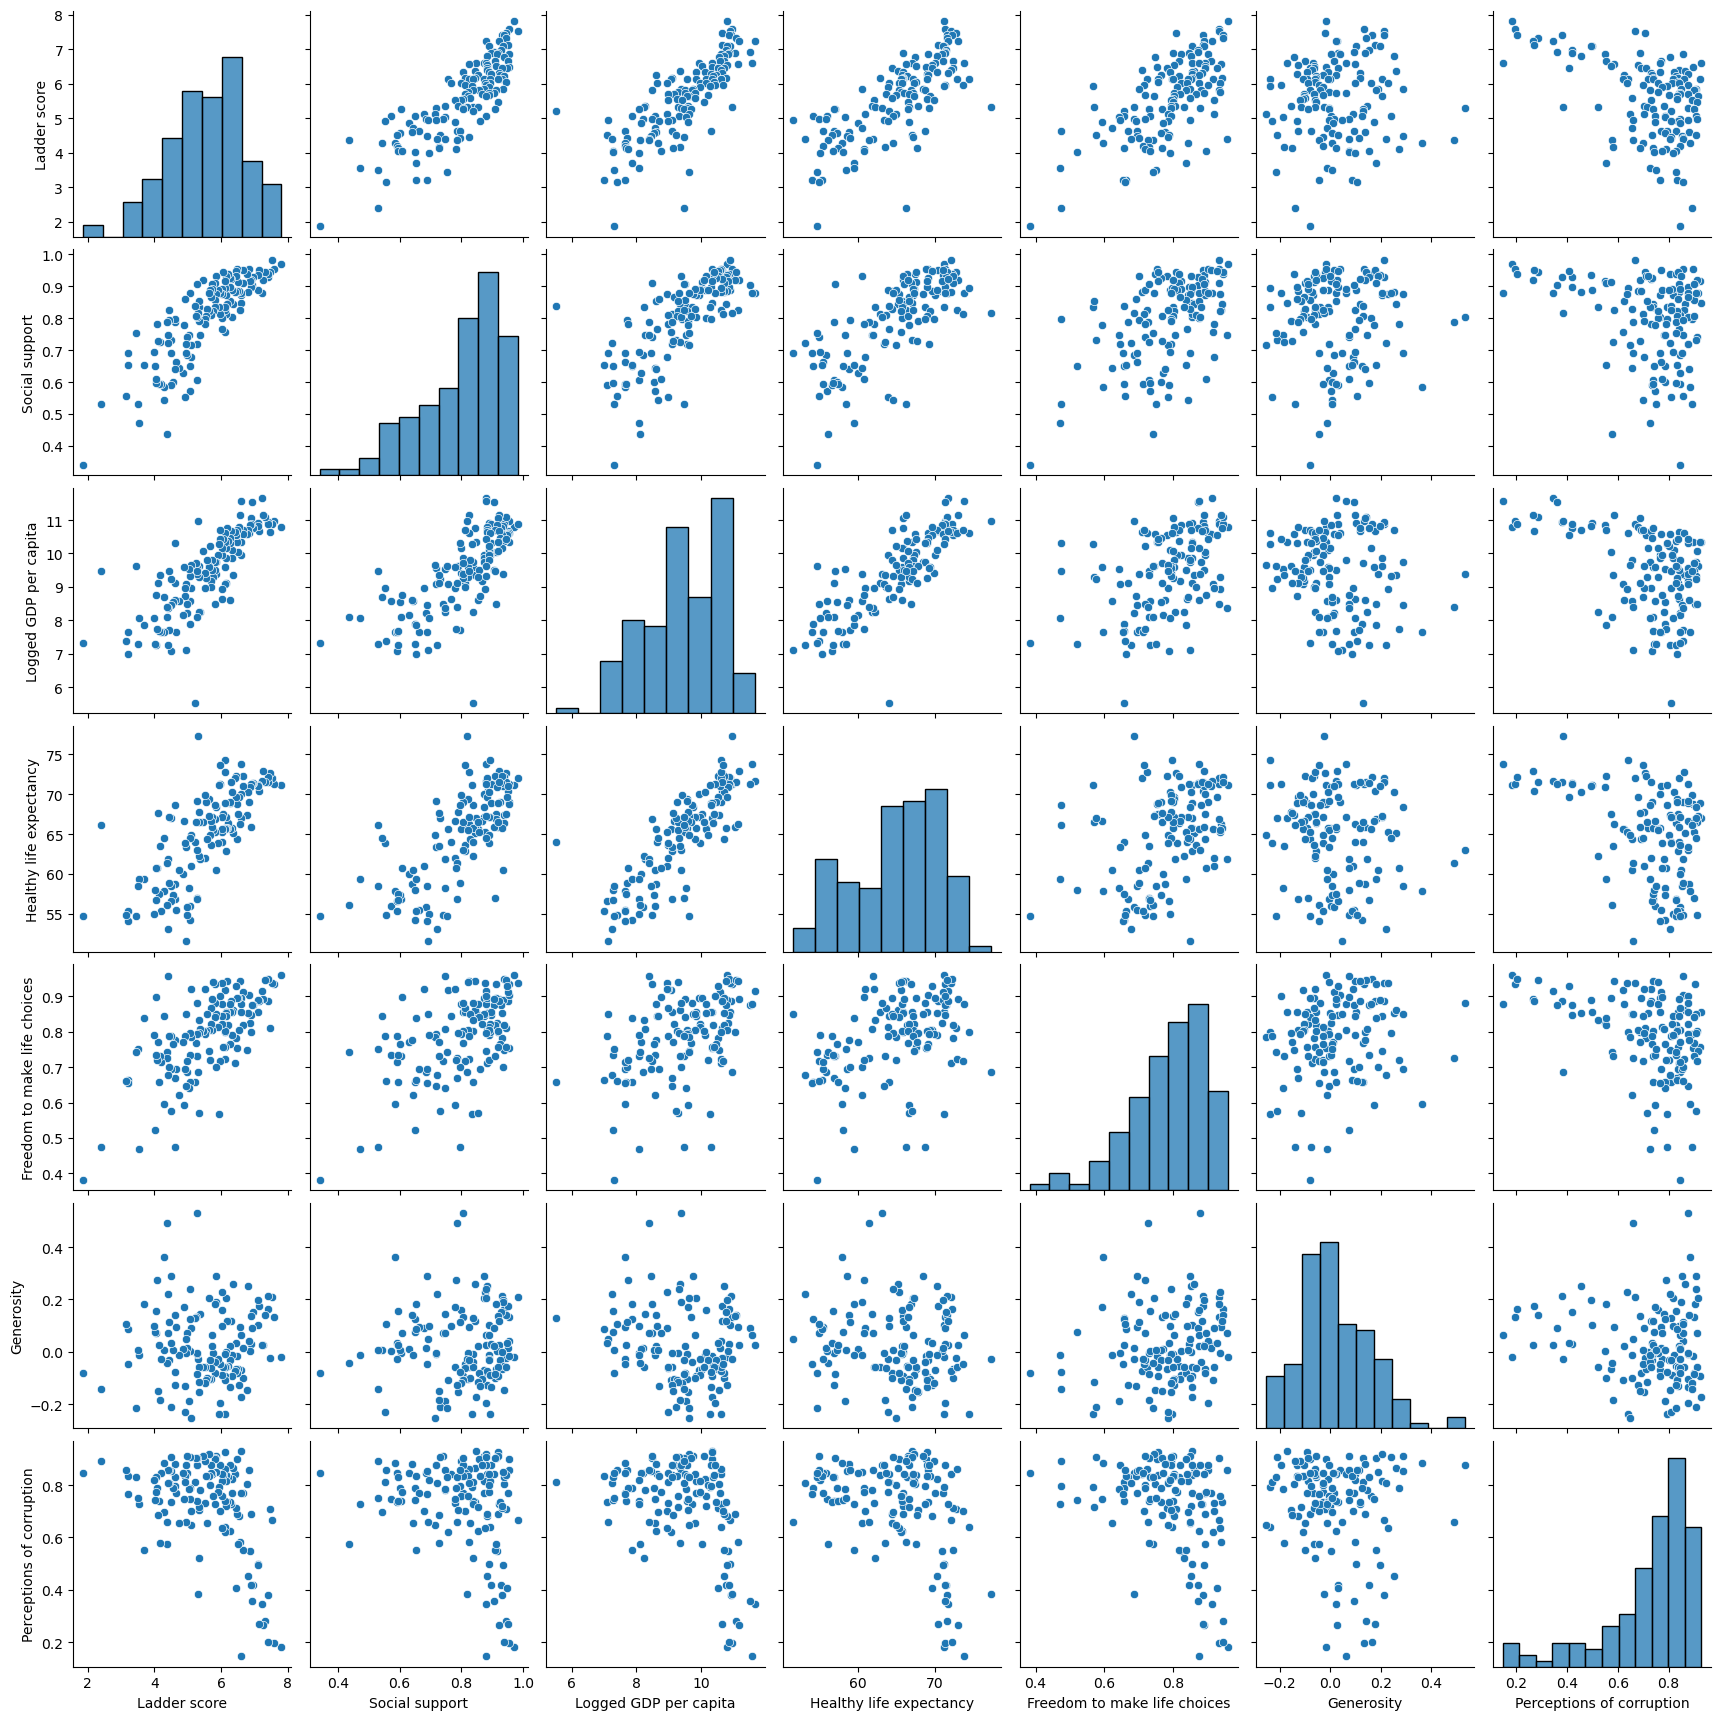

In [94]:
sns.pairplot(df_work_clean)

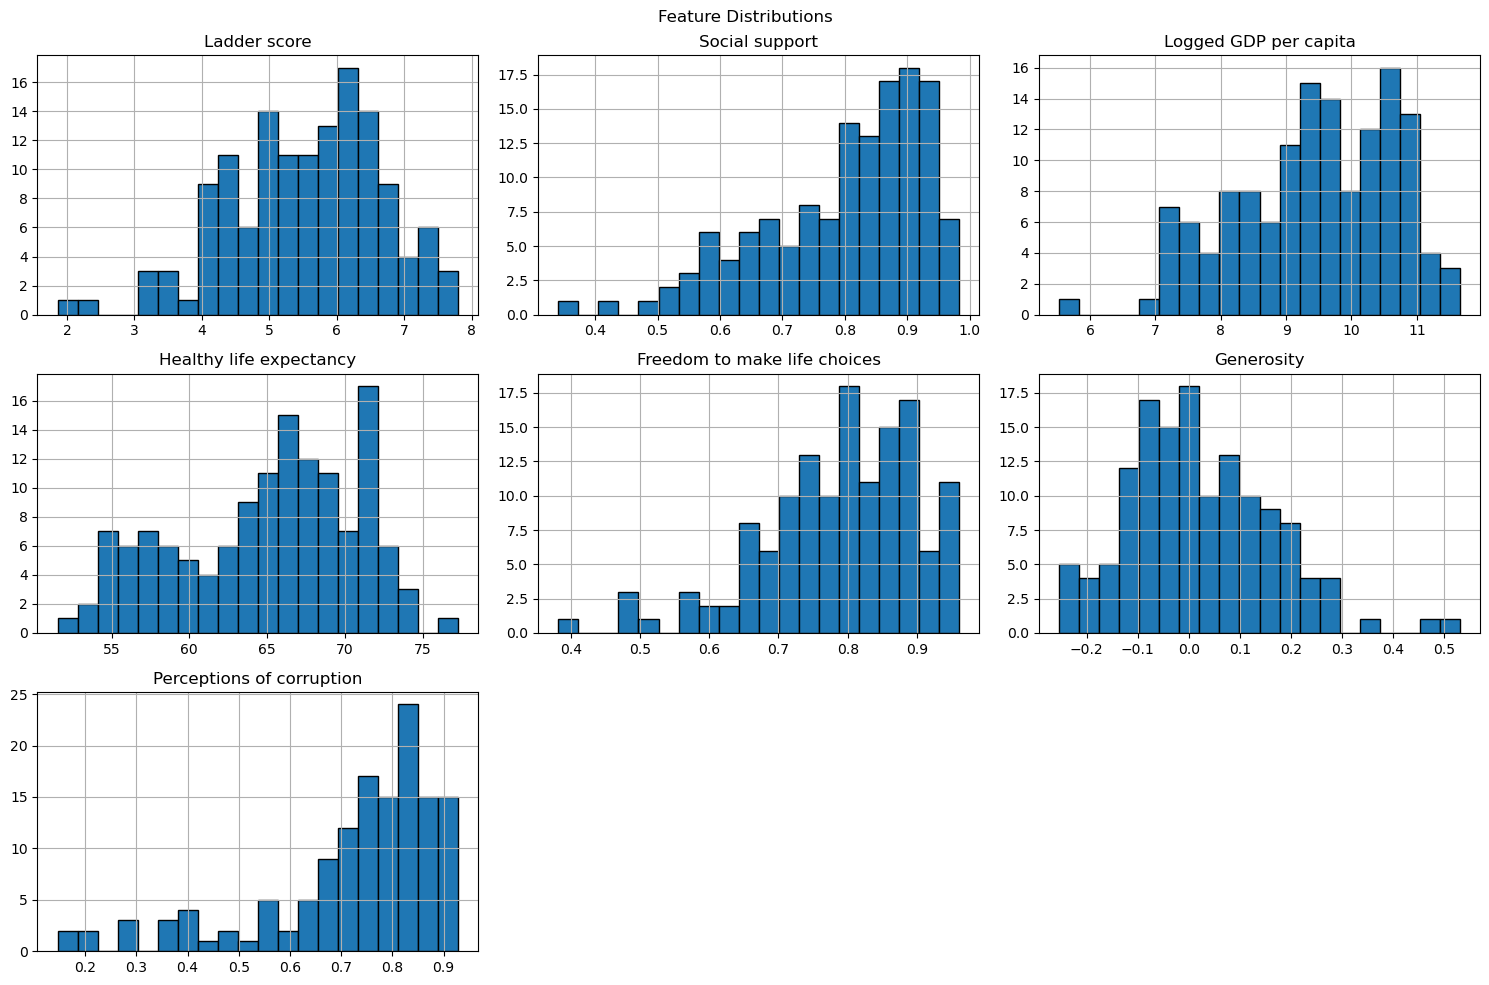

In [121]:
df_work_clean.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

Text(0.5, 1.03, 'Boxplots of Core Happiness Features')

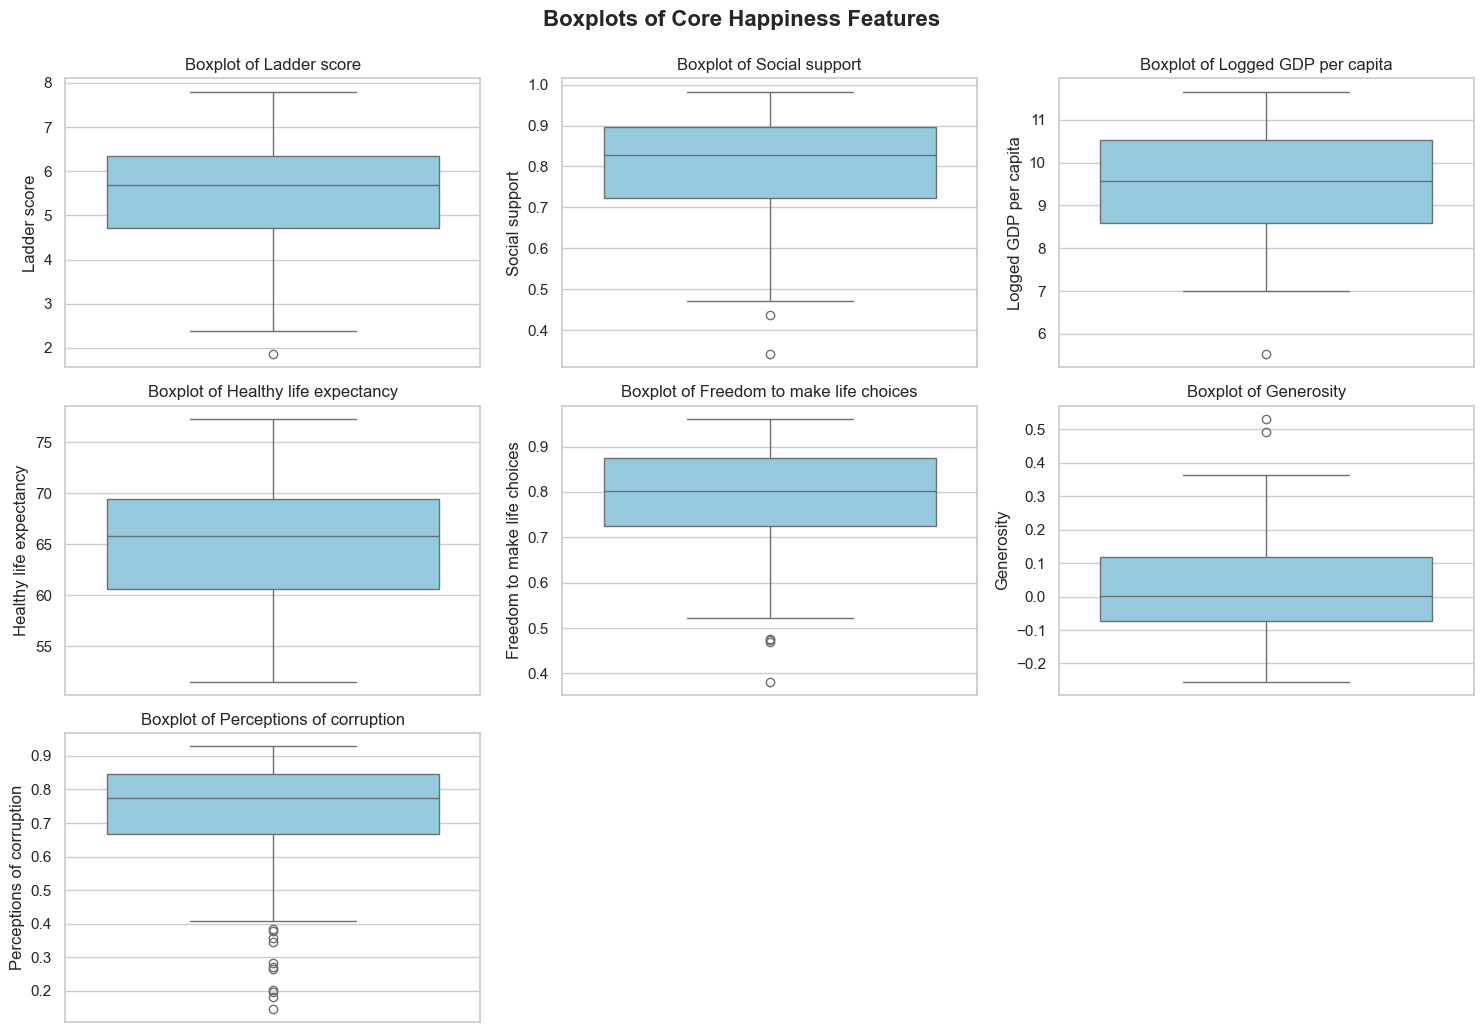

In [151]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
# loop through each feature and make a boxplot
for i, feature in enumerate(df_work_clean, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_work_clean[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()

plt.suptitle('Boxplots of Core Happiness Features', fontsize=16, fontweight='bold', y=1.03)

We can see we get some outliers, some longish whiskers from the boxplots above. The histograms also show some skewing so we'll also do some lor or square root transformation